#### Data loading

In [ ]:
#Loading the diabetes.arff dataset
import pandas as pd
from scipy.io.arff import loadarff

data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [ ]:
#Ensuring no missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Choosing the independent and dependent variables
X = df.drop('Outcome',axis='columns')
y = df['Outcome']


#### Problem 1

In [ ]:
#Variables with best and worst discriminative power
from sklearn.feature_selection import f_classif

fimportance = f_classif(X, y)

print('features', X.columns.values)
print('fvalues', fimportance[0])
print('pvalues', fimportance[1])

features ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
fvalues [ 39.67022739 213.16175218   3.2569504    4.30438091  13.28110753
  71.7720721   23.8713002   46.14061124]
pvalues [5.06512730e-10 8.93543165e-43 7.15139001e-02 3.83477048e-02
 2.86186460e-04 1.22980749e-16 1.25460701e-06 2.20997546e-11]


The Glucose variable is the one showing the highest f-value in the Analysis of Variance statistical test, and hence it has the best discriminative power. The low p-value supports the statistical significance of this result. The BloodPressure variable shows the smallest f-value, and hence has the worst discriminative power.  

In [ ]:
#Class-conditional probability density functions
import matplotlib.pyplot as plt
import numpy as np

#Filtering the dataset by class
df_0 = df[df['Outcome']=='0']
df_1 = df[df['Outcome']=='1']

#Obtaining the Glucose and BloodPressure columns
df_Glucose_0 = df_0['Glucose']
df_Glucose_1 = df_1['Glucose']
df_BloodPressure_0 = df_0['BloodPressure']
df_BloodPressure_1 = df_1['BloodPressure']

#Obtaining the x-axis values
x_Glucose = np.linspace(df['Glucose'].min(), df['Glucose'].max(), 1000)
x_BloodPressure = np.linspace(df['BloodPressure'].min(), df['BloodPressure'].max(), 1000)

#Obtaining the normal distribution
def normal_distribution(x_axis, data):
  mean = data.mean()
  std = data.std()
  return [np.exp(-((x-mean)/std)**2/2)/(std*np.sqrt(2*np.pi)) for x in x_axis]

y_Glucose_0 = normal_distribution(x_Glucose, df_Glucose_0)
y_Glucose_1 = normal_distribution(x_Glucose, df_Glucose_1)
y_BloodPressure_0 = normal_distribution(x_BloodPressure, df_BloodPressure_0)
y_BloodPressure_1 = normal_distribution(x_BloodPressure, df_BloodPressure_1)


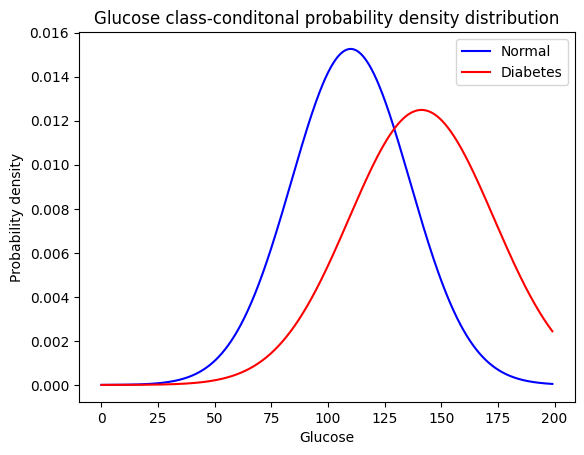

In [ ]:
#Plotting the Glucose class-conditonal probability density distributions:
plt.plot(x_Glucose, y_Glucose_0, label="Normal", color='blue')
plt.plot(x_Glucose, y_Glucose_1, label="Diabetes", color='red')

plt.xlabel('Glucose')
plt.ylabel('Probability density')
plt.legend()
plt.title('Glucose class-conditonal probability density distribution')
plt.show()

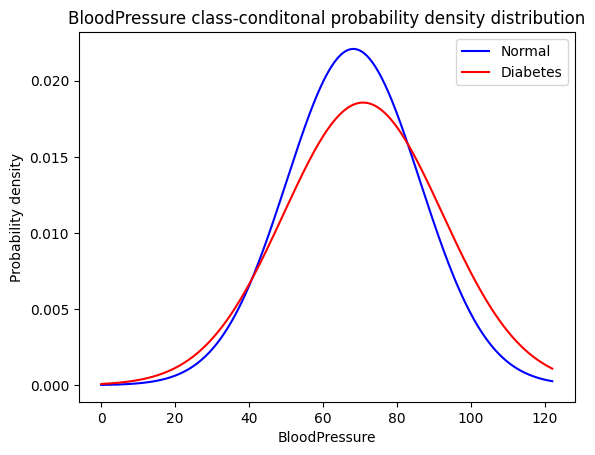

In [ ]:
#Plotting the BloodPressure class-conditonal probability density distributions:
plt.plot(x_BloodPressure, y_BloodPressure_0, label="Normal", color='blue')
plt.plot(x_BloodPressure, y_BloodPressure_1, label="Diabetes", color='red')

plt.xlabel('BloodPressure')
plt.ylabel('Probability density')
plt.legend()
plt.title('BloodPressure class-conditonal probability density distribution')
plt.show()

#### Problem 2

In [ ]:
#Train-testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1)


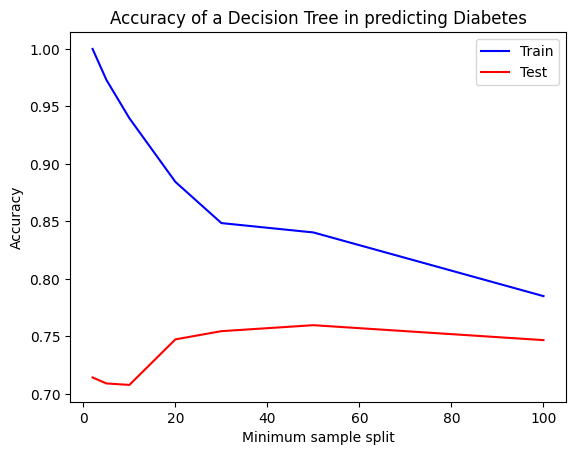

In [ ]:
#Fitting and evaluating the Decision Tree
from sklearn import metrics, tree

Min_sample_split = [2, 5, 10, 20, 30, 50, 100]
train_acc = []
test_acc = []

for i in Min_sample_split:
  this_train_acc = []
  this_test_acc = []
  for j in range(10):
    #Model fitting
    predictor = tree.DecisionTreeClassifier(min_samples_split = i)
    predictor.fit(X_train, y_train)

    #Predicting
    y_train_pred = predictor.predict(X_train)
    y_test_pred = predictor.predict(X_test)

    #Evaluating accuracy
    this_train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
    this_test_acc.append(metrics.accuracy_score(y_test, y_test_pred))

  train_acc.append(np.mean(this_train_acc))
  test_acc.append(np.mean(this_test_acc))

#Plotting the accuracy
plt.plot(Min_sample_split, train_acc, label='Train', color = 'blue')
plt.plot(Min_sample_split, test_acc, label='Test', color = 'red')

#plt.ylim(0,1)
plt.xlabel('Minimum sample split')
plt.ylabel('Accuracy')
plt.title('Accuracy of a Decision Tree in predicting Diabetes')
plt.legend()
plt.show()


#### Problem 3

We can observe that the testing accuracy increased as the minimum sample split number decreased from 100 to 50, suggesting the model was underfitted for minimum sample split numbers smaller than 50. A lower value of minimum sample split means the model will need a smaller amount of observations in a node to create a split, and hence the tree will have more nodes and leaves and will be more specialized / less general, therefore reducing the underfitting. However, the testing accuracy decreased and the training accuracy increased as the minimum sample splits decreased from 50 to 2, suggesting the model was overfitting. A small minimum sample split number leads to a big number of nodes and leaves and therefore a model too specialized to the training dataset.

Hence, for this Decision Tree Classifier and for this dataset, among the tested values, a minimum sample split of 50 is the best to balance the tree generalization capacity and the test accuracy.

#### Problem 4

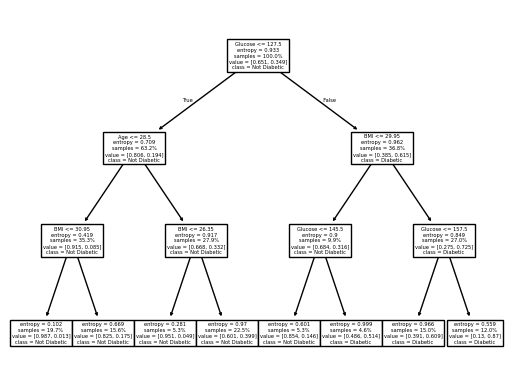

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

predictor = tree.DecisionTreeClassifier(criterion='entropy',random_state = 1, max_depth = 3)
predictor.fit(X,y)
tree.plot_tree(predictor, feature_names=X.columns, class_names=['Not Diabetic',"Diabetic"], proportion=True)
plt.show()

#### Histograms for Pen and Paper Problem 4

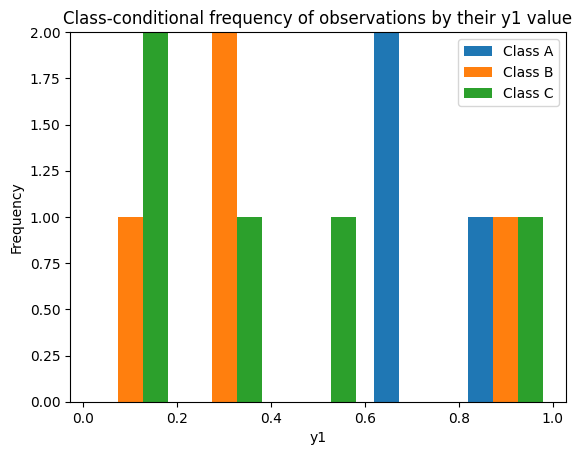

In [3]:
import matplotlib.pyplot as plt


y1 = [[0.73, 0.76, 0.86],[0.06, 0.21, 0.3, 0.89], [0.01, 0.16, 0.22, 0.47, 0.93]]

plt.hist(y1, 5, range=(0,1),label=['Class A', 'Class B', 'Class C'])
plt.ylim(top=2.0)
plt.xlabel('y1')
plt.ylabel('Frequency')
plt.legend()
plt.title('Class-conditional frequency of observations by their y1 value')

plt.show()